# Clustering Songs Project (1000 songs)

- Are Spotify’s audio features able to identify “similar songs”, as defined by humanly detectable criteria? When you listen to two rock ballads, two operas or two drum & bass songs, you identify them as similar songs. 

- Are these similarities detectable using the audio features from Spotify?

- Is K-Means a good method to create playlists? Would you stick with this algorithm moving forward, or explore other methods to create playlists?

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [556]:
cwd = os.getcwd()
csv_file = cwd + "/df_audio_features_1000.csv"
df = pd.read_csv(csv_file, index_col='html')

In [557]:
# df = df[['energy', 'tempo', 'valence']]
df.drop(['artist','id', 'name', 'type'], axis=1, inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
html,,,,,,,,,,,,,
https://open.spotify.com/track/5ueyLj6e6oVaTY0KQ6yLaA,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
https://open.spotify.com/track/3aEJMh1cXKEjgh52claxQp,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
https://open.spotify.com/track/307XEC1IUwUs9ojlEFwH7f,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
https://open.spotify.com/track/5yQ9iMZXGcr5rlO4hoLsP4,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
https://open.spotify.com/track/3vFVS2WYHDG4KkWCNecvpn,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [502]:
# scale our data

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

df_columns = ['tempo', 'valence', 'energy', 'danceability']
df_simple = df[df_columns]

orig_scaled_df = pd.DataFrame(
    MinMaxScaler(feature_range=(0,1)).fit(df).transform(df),
    index=df.index,
    columns=df.columns
)

minmax_scaled_df = pd.DataFrame(
    MinMaxScaler(feature_range=(0,1)).fit(df_simple).transform(df_simple),
    index=df_simple.index,
    columns=df_simple.columns
)

standard_scaled_df = pd.DataFrame(
    StandardScaler().fit(df_simple).transform(df_simple),
    index=df_simple.index,
    columns=df_simple.columns
)

robust_scaled_df = pd.DataFrame(
    RobustScaler().fit(df_simple).transform(df_simple),
    index=df_simple.index,
    columns=df_simple.columns
)

quantile_scaled_df = pd.DataFrame(
    QuantileTransformer().fit(df_simple).transform(df_simple),
    index=df_simple.index,
    columns=df_simple.columns
)

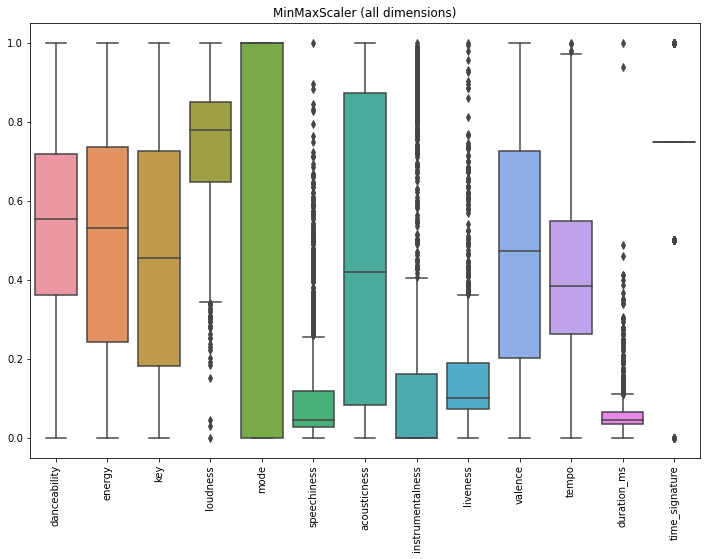

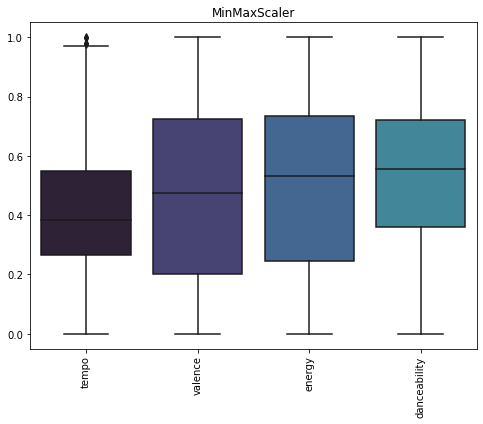

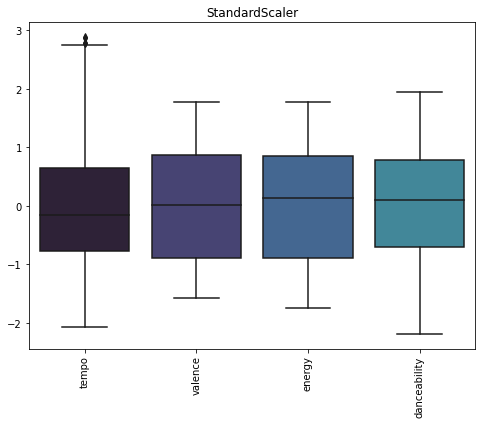

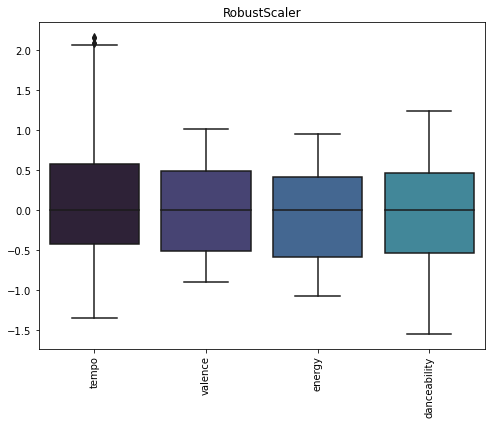

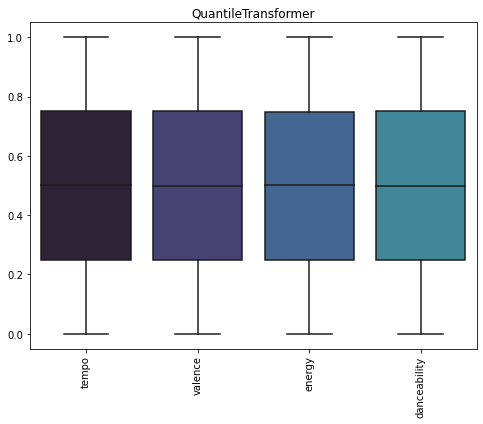

In [503]:
# plot the distributions
plt.subplots(figsize=(12, 8))
plt.title('MinMaxScaler (all dimensions)')
plt.xticks(rotation='vertical')
sns.boxplot(data=orig_scaled_df)
plt.show()

plt.subplots(figsize=(8, 6))
plt.title('MinMaxScaler')
plt.xticks(rotation='vertical')
sns.boxplot(data=minmax_scaled_df)
plt.show()

plt.subplots(figsize=(8, 6))
plt.title('StandardScaler')
plt.xticks(rotation='vertical')
sns.boxplot(data=standard_scaled_df)
plt.show()

plt.subplots(figsize=(8, 6))
plt.title('RobustScaler')
plt.xticks(rotation='vertical')
sns.boxplot(data=robust_scaled_df)
plt.show()

plt.subplots(figsize=(8, 6))
plt.title('QuantileTransformer')
plt.xticks(rotation='vertical')
sns.boxplot(data=quantile_scaled_df)
plt.show()


# Apply K-Means to define the clusters


In [525]:
from sklearn.cluster import KMeans

num_k = 4
scaled_df = minmax_scaled_df.copy()

# initialize the model with num_k clusters for now and fit the data
scaled_df_kmeans = KMeans(n_clusters=num_k).fit(scaled_df)

# obtain the cluster output
clusters = scaled_df_kmeans.predict(scaled_df)
scaled_df["cluster"] = clusters

scaled_df

,tempo,valence,energy,danceability,cluster
html,,,,,
https://open.spotify.com/track/5ueyLj6e6oVaTY0KQ6yLaA,0.156106,0.965817,0.469869,0.624060,3
https://open.spotify.com/track/3aEJMh1cXKEjgh52claxQp,0.494567,0.591879,0.247977,0.580938,1
https://open.spotify.com/track/307XEC1IUwUs9ojlEFwH7f,0.412383,0.211726,0.227896,0.254755,0
https://open.spotify.com/track/5yQ9iMZXGcr5rlO4hoLsP4,0.247063,0.802155,0.683728,0.531181,3
https://open.spotify.com/track/3vFVS2WYHDG4KkWCNecvpn,0.168742,0.398177,0.167654,0.437196,1
...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.244005,0.047545,0.069660,0.157452,0
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.213537,0.016470,0.101387,0.141973,0
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.139723,0.015330,0.000913,0.000000,0


In [526]:
scaled_df.groupby(by="cluster").mean() 

,tempo,valence,energy,danceability
cluster,,,,
0,0.328156,0.094160,0.141950,0.211902
1,0.394812,0.446289,0.345517,0.560292
2,0.547086,0.365332,0.781466,0.518234
3,0.428046,0.784485,0.681511,0.726480


In [527]:
centroids = scaled_df_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_columns)
centroids_df

,tempo,valence,energy,danceability
0,0.328156,0.094160,0.141950,0.211902
1,0.394812,0.446289,0.345517,0.560292
2,0.547086,0.365332,0.781466,0.518234
3,0.428046,0.784485,0.681511,0.726480


<AxesSubplot:>

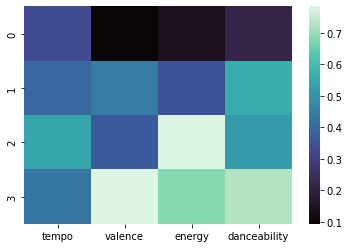

In [528]:
sns.heatmap(centroids_df, cmap="mako")

In [529]:
def print_clusters(num):
    for cluster in range(0, num):
        print("Cluster #" + str(cluster) + " song samples: ")
        for url in scaled_df.query('cluster == ' + str(cluster)).sample(3).index:
            print("https://open.spotify.com/track/" + id)
            print(scaled_df.loc[scaled_df.index == url].reset_index()[df_columns])
        print("----\n")

In [530]:
print_clusters(num_k)

Cluster #0 song samples: 
https://open.spotify.com/track/2L40SzklXISbK6ffl8ZLNq
      tempo   valence   energy  danceability
0  0.081297  0.015848  0.12448      0.241486
https://open.spotify.com/track/1JXxyiihPJrMLotLklU0Cb
      tempo   valence    energy  danceability
0  0.180649  0.122643  0.144561      0.328837
https://open.spotify.com/track/3ZR0us36Z8kgBXFMYkhugR
      tempo   valence    energy  danceability
0  0.779331  0.147504  0.110424      0.155241
----

Cluster #1 song samples: 
https://open.spotify.com/track/2Fxmhks0bxGSBdJ92vM42m
      tempo  valence    energy  danceability
0  0.545504  0.56184  0.426695      0.709199
https://open.spotify.com/track/2IpGdrWvIZipmaxo1YRxw5
     tempo   valence    energy  danceability
0  0.15527  0.320489  0.603406      0.868421
https://open.spotify.com/track/5ihS6UUlyQAfmp48eSkxuQ
      tempo   valence    energy  danceability
0  0.700314  0.417858  0.161629      0.391862
----

Cluster #2 song samples: 
https://open.spotify.com/track/6qC8Jj1XO

In [531]:
scaled_df_kmeans.inertia_

134.5898638018617

# Choosing the right number of clusters

In [532]:
# mydf = scaled_df.reset_index().drop(['html'], axis=1, inplace=False)
scaled_df.head()

,tempo,valence,energy,danceability,cluster
html,,,,,
https://open.spotify.com/track/5ueyLj6e6oVaTY0KQ6yLaA,0.156106,0.965817,0.469869,0.624060,3
https://open.spotify.com/track/3aEJMh1cXKEjgh52claxQp,0.494567,0.591879,0.247977,0.580938,1
https://open.spotify.com/track/307XEC1IUwUs9ojlEFwH7f,0.412383,0.211726,0.227896,0.254755,0
https://open.spotify.com/track/5yQ9iMZXGcr5rlO4hoLsP4,0.247063,0.802155,0.683728,0.531181,3
https://open.spotify.com/track/3vFVS2WYHDG4KkWCNecvpn,0.168742,0.398177,0.167654,0.437196,1


<AxesSubplot:xlabel='tempo', ylabel='valence'>

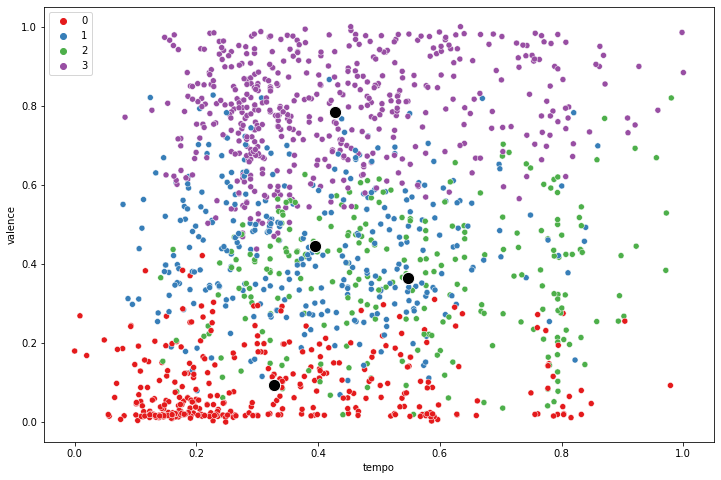

In [533]:
x_col = "tempo"
y_col = "valence" # 0 = sad, 1 = good vibes
plt.subplots(figsize=(12,8))
sns.scatterplot(data=scaled_df, x=x_col, y=y_col, hue='cluster', palette='Set1')
sns.scatterplot(data=centroids_df, x=x_col, y=y_col, color='black', s=150)
#plt.show()

## Inertia

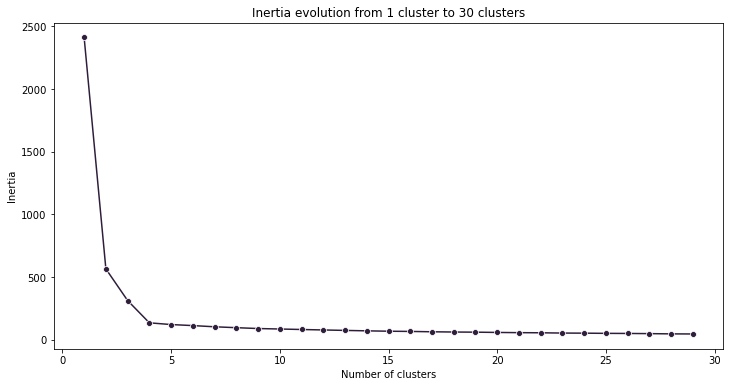

In [534]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## Silhouette Score

In [535]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_df, scaled_df_kmeans.labels_)

0.6596696710319059

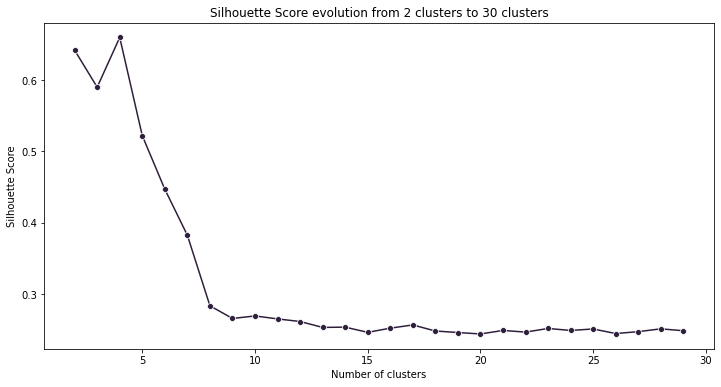

In [536]:
max_k = 30
silhouettes = []

for k in range(2, max_k): 
    curr_kmeans = KMeans(n_clusters=k).fit(scaled_df)
    silhouettes.append(silhouette_score(scaled_df, curr_kmeans.labels_))

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Silhouette Score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [537]:
scaled_df_score = silhouette_score(scaled_df, scaled_df_kmeans.labels_)
scaled_df_score

0.6596696710319059

# Outliers

An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean. Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier. Outlier calculations are performed separately for each column.

In [542]:
# remove outliers using zscore

import numpy as np
from scipy import stats

numeric_df = df.reset_index().drop(['html'], axis=1, inplace=False)
numeric_df2 = numeric_df[ (np.abs(stats.zscore(numeric_df)) < 3).all(axis=1) ]
numeric_df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.6240,0.4680,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
1,0.5850,0.2470,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
3,0.5400,0.6810,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
4,0.4550,0.1670,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
5,0.5360,0.6370,2,-7.774,1,0.0343,0.467,0.000000,0.0838,0.7980,115.240,150133,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,0.3860,0.1240,11,-22.869,0,0.0440,0.945,0.917000,0.0853,0.3190,142.307,443907,4
1434,0.0619,0.0830,4,-25.543,0,0.0452,0.935,0.651000,0.0860,0.0261,61.525,774707,4
1436,0.1880,0.1010,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
1438,0.1330,0.0208,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4
